# **Import Library:** 분석에 사용할 모듈 설치

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Deep-Learning/blob/main/Practice4-3_DeepLearning_CNNArchitectures_KK.ipynb)

In [1]:
# !pip install --upgrade pip
# !python -m pip install --user --upgrade pip

In [2]:
# # Tensorflow 및 Keras 설치하기
# !pip install tensorflow==2.10.*
# # !pip install --upgrade --user tensorflow
# !pip install -U tensorflow-addons
# !pip install keras
# # !pip install --upgrade --user keras
# !pip install keras-tqdm

In [3]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
tf.get_logger().warning('test')
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Dropout, Reshape
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import plot_model

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation metrics
from sklearn import metrics
# for regression
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error
# for classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [4]:
# 사용자 정의 함수
from module_regression import *
from module_classification import *

# **Problem:** 숫자이미지 분류

## Data Preprocessing

In [5]:
# MNIST(Modified National Institute of Standards and Technology)를 Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (60000, 28, 28) 0 255
Y:  (60000,)
----------------test----------------
X:  (10000, 28, 28) 0 255
Y:  (10000,)


In [7]:
# 샘플 데이터 출력
# 0에서 255 사이의 값을 가진 데이터
for i in range(X_train[0].shape[0]):
    for j in range(X_train[0].shape[1]):
        print('{:4d}'.format(X_train[0][i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

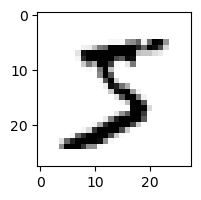

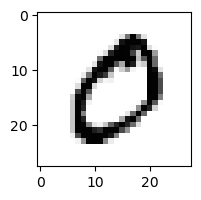

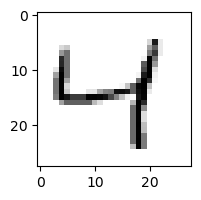

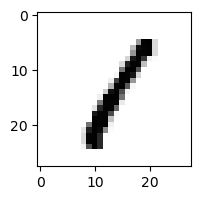

Label of train:  [5 0 4 1]


In [8]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i], cmap='Greys')
    plt.show()

print('Label of train: ', Y_train[:4])

In [9]:
# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0


In [10]:
# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

X_train: (60000, 784) Y_train: (60000,)
X_test: (10000, 784) Y_test: (10000,)


## MLP

In [11]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


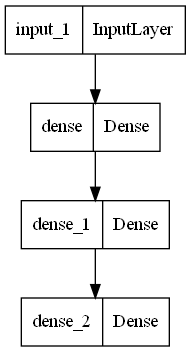

In [12]:
# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

Epoch 1/5
750/750 [==============================] - 6s 3ms/step - loss: 0.2609 - accuracy: 0.9235 - val_loss: 0.1261 - val_accuracy: 0.9621
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1026 - accuracy: 0.9691 - val_loss: 0.1064 - val_accuracy: 0.9680
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0659 - accuracy: 0.9795 - val_loss: 0.0980 - val_accuracy: 0.9712
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0849 - val_accuracy: 0.9761
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0338 - accuracy: 0.9887 - val_loss: 0.0979 - val_accuracy: 0.9722


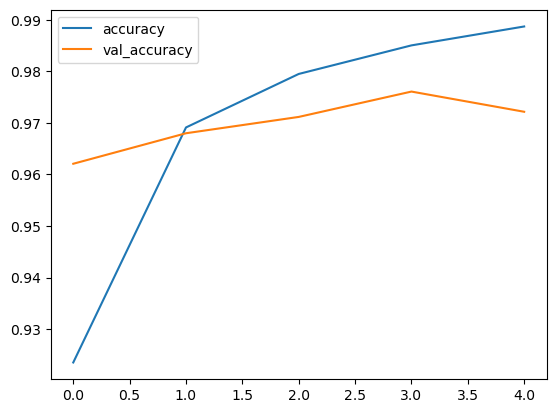

In [13]:
# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

### Prediction and Evaluation

In [14]:
# Train 데이터 예측하기
Y_trpred = model.predict(X_train)
print(Y_trpred, '\n\n', np.argmax(Y_trpred, axis=1))

1875/1875 [==============================] - 2s 1ms/step
[[1.25654263e-14 5.59514990e-10 1.22418978e-10 ... 1.95847765e-11
  3.16572046e-11 3.78410636e-10]
 [9.99861360e-01 1.35520093e-08 1.37598981e-04 ... 3.12239941e-08
  2.91304914e-09 3.01008896e-07]
 [1.35805625e-08 2.36555006e-05 1.85195095e-05 ... 2.08819474e-04
  3.21677476e-06 1.62535689e-05]
 ...
 [3.62237164e-14 4.81543798e-11 4.57500628e-13 ... 7.71036446e-13
  3.02878805e-10 1.47458334e-09]
 [3.34265496e-05 7.48801995e-06 2.07898711e-06 ... 4.29190017e-08
  1.93702544e-06 4.15225792e-08]
 [1.62658398e-05 6.68827342e-05 2.00877292e-03 ... 1.39105279e-04
  9.97759581e-01 4.07019206e-06]] 

 [5 0 4 ... 5 6 8]


In [15]:
# Test 데이터 예측하기
Y_tepred = model.predict(X_test)
print(Y_tepred, '\n\n', np.argmax(Y_tepred, axis=1))

313/313 [==============================] - 0s 1ms/step
[[2.8912626e-07 9.5019125e-08 5.5999761e-05 ... 9.9989307e-01
  1.6798141e-06 5.2202613e-06]
 [1.3249383e-11 2.5444567e-06 9.9999750e-01 ... 6.8135864e-10
  3.9638639e-08 1.6752604e-17]
 [7.4630373e-07 9.9928135e-01 5.7696569e-05 ... 3.1099908e-04
  2.9859412e-04 2.6129953e-07]
 ...
 [2.3019139e-12 5.8813585e-09 2.0986855e-11 ... 7.5627156e-08
  1.6680497e-07 6.9182533e-07]
 [1.3871421e-11 1.7458047e-09 3.0222346e-12 ... 4.2311055e-10
  1.9820008e-07 3.4743332e-12]
 [1.8210671e-06 1.1860095e-08 2.8125218e-08 ... 3.8090323e-11
  2.8607565e-07 2.1278250e-10]] 

 [7 2 1 ... 4 5 6]


In [16]:
# Train 예측 성능 평가하기
# 학습과정의 결과와 유사
model.evaluate(X_train, Y_train, batch_size=32)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0431 - accuracy: 0.9871


[0.04305805265903473, 0.9871000051498413]

In [17]:
# Train 예측 성능 평가하기
# 학습과정의 결과와 유사
pd.crosstab(Y_train, np.argmax(model.predict(X_train), axis=1),
            rownames=['True'], colnames=['Pred'])

1875/1875 [==============================] - 2s 964us/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,5880,1,12,0,0,2,12,3,11,2
1,0,6709,2,2,2,1,4,9,11,2
2,2,7,5936,2,1,1,1,5,3,0
3,0,2,80,5881,1,83,0,12,68,4
4,1,5,2,0,5793,0,2,6,7,26
5,1,0,7,5,1,5360,23,3,16,5
6,3,1,3,0,5,9,5894,0,3,0
7,1,12,29,1,4,2,0,6206,6,4
8,3,6,28,5,3,10,11,4,5781,0


In [18]:
# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0744 - accuracy: 0.9772


[0.07436173409223557, 0.9771999716758728]

In [19]:
# Test 예측 성능 평가하기
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,965,0,7,0,1,1,3,0,3,0
1,0,1126,3,1,0,0,2,0,3,0
2,1,0,1020,0,2,0,0,4,5,0
3,1,0,4,966,0,19,0,7,11,2
4,2,1,2,0,958,0,2,3,2,12
5,1,0,0,3,1,877,5,1,4,0
6,4,3,0,0,8,8,933,0,2,0
7,0,3,10,1,0,0,0,1006,4,4
8,1,0,5,3,4,1,6,2,951,1


In [20]:
# 임의 데이터를 예측하고 정답과 비교하기
print('목표값: ', Y_train[idx_rand])
idx_rand = np.random.randint(0, X_train.shape[0])
print('예측값: ', np.argmax(model.predict(X_train[idx_rand][np.newaxis,:])))

1/1 [==============================] - 0s 21ms/step
예측값:  8
목표값:  8


### Summary

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 784) Y_train: (60000,)
X_test: (10000, 784) Y_test: (10000,)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
750/750 [==========

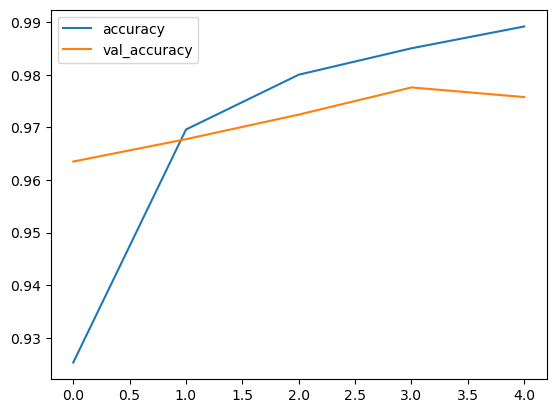

313/313 [==============================] - 1s 2ms/step - loss: 0.0702 - accuracy: 0.9791

Test Confusion Maxtrix: 
313/313 [==============================] - 1s 2ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,969,0,3,1,1,1,2,0,2,1
1,0,1126,3,0,0,2,1,0,3,0
2,2,0,1015,2,3,0,1,5,4,0
3,1,0,5,980,0,10,0,5,5,4
4,1,1,4,0,964,0,2,2,0,8
5,2,0,0,5,2,876,5,1,0,1
6,2,3,0,0,12,6,932,0,2,1
7,1,5,10,1,1,0,0,1000,2,8
8,1,0,3,4,6,3,4,2,948,3


In [21]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

### Convolution and Pooling

- **Convolution**

In [22]:
# 임의 데이터 생성
X = tf.random.normal(shape=(128,28,28,1), mean=0., stddev=1.) # [batch size, W, H, channel]
X.shape

TensorShape([128, 28, 28, 1])

In [23]:
# 합성곱을 통과한 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 26, 26, 32)


In [24]:
# STRIDE 이동을 빠르게 할 경우의 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 13, 13, 32)


In [25]:
# 입력과 출력의 크기가 같은 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same', activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 14, 14, 32)


- **Pooling**

In [26]:
# 임의 데이터 생성
X = tf.random.normal(shape=(128,28,28,1), mean=0., stddev=1.) # [batch size, W, H, channel]
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same', activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 14, 14, 32)


In [27]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(2,2), strides=(2,2))(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 7, 7, 32)


In [28]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(4,4), strides=(4,4))(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 3, 3, 32)


In [29]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(4,4), strides=(4,4), padding='same')(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 4, 4, 32)


### Summary

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 10)                250890    
                       

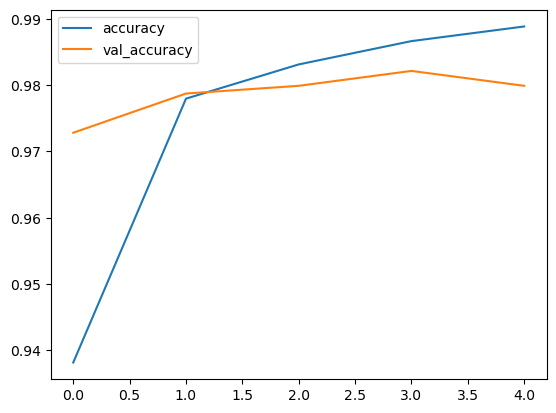

313/313 [==============================] - 1s 2ms/step - loss: 0.0596 - accuracy: 0.9811

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,971,0,2,1,0,1,2,0,3,0
1,0,1126,4,1,1,0,1,1,1,0
2,2,1,1022,0,1,0,0,3,2,1
3,0,0,6,981,0,16,0,1,6,0
4,1,1,1,0,971,0,2,0,0,6
5,2,0,1,3,0,884,2,0,0,0
6,7,2,2,0,3,6,936,0,2,0
7,0,2,16,3,2,0,0,994,8,3
8,5,0,8,0,2,3,1,3,949,3


In [30]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Flatten()(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN with Tuning

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        73792     
                       

Training:   0%|                                                                                 0/5 ETA: ?s,  …

Epoch 1/5
750/750 [==============================] - 17s 22ms/step - loss: 0.3351 - accuracy: 0.8935 - val_loss: 0.0675 - val_accuracy: 0.9798
Epoch 2/5
750/750 [==============================] - 5s 7ms/step - loss: 0.1258 - accuracy: 0.9623 - val_loss: 0.0500 - val_accuracy: 0.9840
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0963 - accuracy: 0.9706 - val_loss: 0.0493 - val_accuracy: 0.9854
Epoch 4/5
750/750 [==============================] - 18s 24ms/step - loss: 0.0809 - accuracy: 0.9754 - val_loss: 0.0430 - val_accuracy: 0.9881
Epoch 5/5
750/750 [==============================] - 5s 7ms/step - loss: 0.0711 - accuracy: 0.9790 - val_loss: 0.0382 - val_accuracy: 0.9893


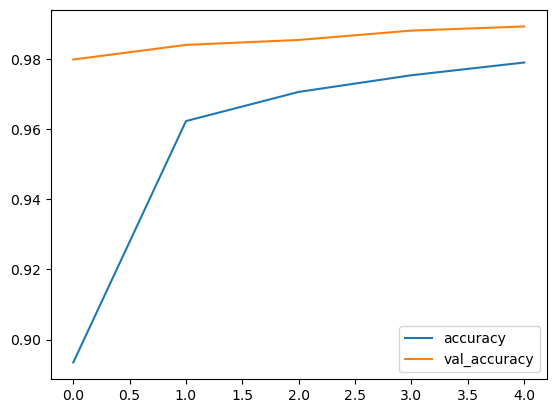

313/313 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9905

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,974,0,1,0,0,1,2,0,1,1
1,0,1131,2,1,0,1,0,0,0,0
2,0,2,1028,0,0,0,0,2,0,0
3,0,0,1,1003,0,4,0,0,2,0
4,0,0,1,0,967,0,4,1,1,8
5,1,0,0,1,0,888,1,0,0,1
6,2,2,1,0,1,2,948,0,2,0
7,0,2,13,1,0,0,0,1009,1,2
8,1,0,1,0,0,1,0,1,968,2


In [31]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Number_MNIST_CNN.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv2D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

In [32]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

313/313 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9905

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,974,0,1,0,0,1,2,0,1,1
1,0,1131,2,1,0,1,0,0,0,0
2,0,2,1028,0,0,0,0,2,0,0
3,0,0,1,1003,0,4,0,0,2,0
4,0,0,1,0,967,0,4,1,1,8
5,1,0,0,1,0,888,1,0,0,1
6,2,2,1,0,1,2,948,0,2,0
7,0,2,13,1,0,0,0,1009,1,2
8,1,0,1,0,0,1,0,1,968,2


목표값: 


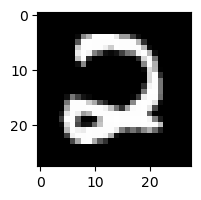

1/1 [==============================] - 0s 54ms/step
예측값:  2


In [33]:
# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
print('예측값: ', np.argmax(model.predict(X_test[idx_rand][np.newaxis,:])))

# **Problem:** 패션이미지 분류

## Data Preprocessing

In [34]:
# Train, Test 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [35]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (60000, 28, 28) 0 255
Y:  (60000,)
----------------test----------------
X:  (10000, 28, 28) 0 255
Y:  (10000,)


In [36]:
# 샘플 데이터 출력
# 0에서 255 사이의 값을 가진 데이터
for i in range(X_train[0].shape[0]):
    for j in range(X_train[0].shape[1]):
        print('{:4d}'.format(X_train[0][i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0
   0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3
   0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15
   0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66
   0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127

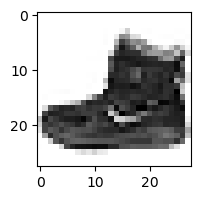

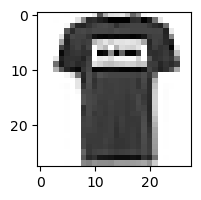

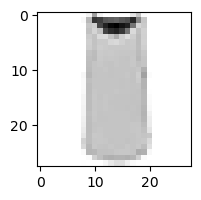

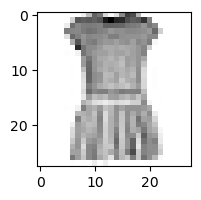

Label of train:  ['Ankle Boot', 'T-shirt', 'T-shirt', 'Dress']


In [37]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i], cmap='Greys')
    plt.show()

Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('Label of train: ', [Y_label_list[num] for num in Y_train[:4]])

## MLP

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 784) Y_train: (60000,)
X_test: (10000, 784) Y_test: (10000,)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
750/750 [=========

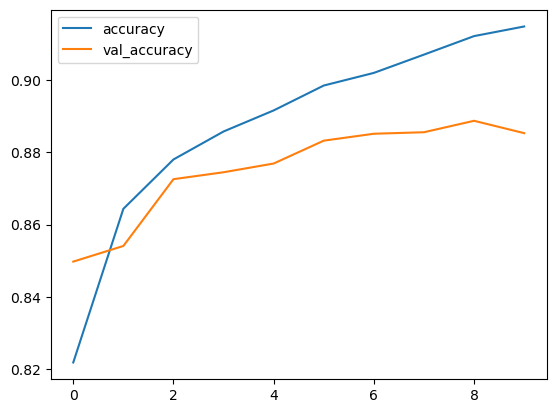

313/313 [==============================] - 1s 2ms/step - loss: 0.3632 - accuracy: 0.8795

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,775,5,20,34,5,0,148,0,13,0
1,0,976,2,18,3,0,0,0,1,0
2,5,2,730,18,170,0,71,0,4,0
3,6,10,7,894,48,0,31,0,4,0
4,1,0,51,19,874,0,48,0,7,0
5,0,0,0,1,0,934,0,45,3,17
6,87,5,66,33,89,0,709,0,11,0
7,0,0,0,0,0,5,0,978,0,17
8,5,0,2,2,6,1,6,4,974,0


In [38]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        73792     
                       

Training:   0%|                                                                                0/10 ETA: ?s,  …

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.6905 - accuracy: 0.7492 - val_loss: 0.3808 - val_accuracy: 0.8633
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4550 - accuracy: 0.8388 - val_loss: 0.3346 - val_accuracy: 0.8788
Epoch 3/10
750/750 [==============================] - 17s 22ms/step - loss: 0.4038 - accuracy: 0.8557 - val_loss: 0.3145 - val_accuracy: 0.8838
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3731 - accuracy: 0.8660 - val_loss: 0.2828 - val_accuracy: 0.8977
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3490 - accuracy: 0.8739 - val_loss: 0.2662 - val_accuracy: 0.9037
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3290 - accuracy: 0.8816 - val_loss: 0.2624 - val_accuracy: 0.9045
Epoch 7/10
750/750 [==============================] - 15s 20ms/step - loss: 0.3182 - accuracy: 0.8850 - val_loss: 0.2479 - val_accuracy: 0.9097
Ep

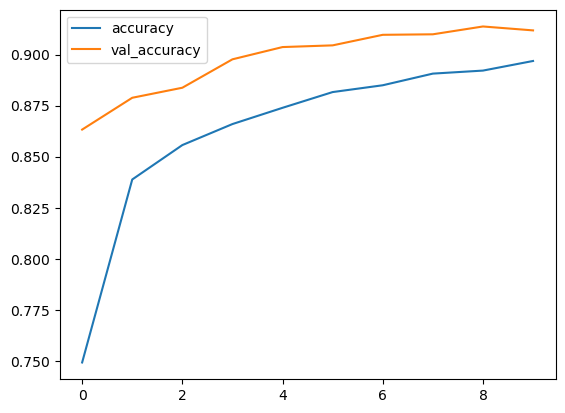

313/313 [==============================] - 1s 2ms/step - loss: 0.2613 - accuracy: 0.9065

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,835,0,25,22,5,1,108,1,3,0
1,1,986,0,7,4,0,1,0,1,0
2,10,2,856,9,67,0,56,0,0,0
3,15,7,10,900,33,0,35,0,0,0
4,0,0,46,19,883,0,52,0,0,0
5,0,0,0,0,0,981,0,12,0,7
6,112,1,62,32,81,0,709,0,3,0
7,0,0,0,0,0,8,0,982,0,10
8,1,1,2,3,7,1,7,4,974,0


In [39]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_CNN.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv2D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


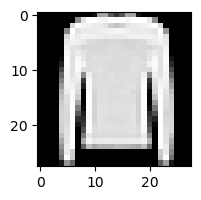

1/1 [==============================] - 0s 76ms/step
예측값:  Pullover


In [40]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

## ResNet50

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 34, 34, 1)    0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 14, 14, 64)   3200        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormal

                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 7, 7, 64)     36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 7, 7, 64)    256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 7, 7, 64)    0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 7, 7, 256)    16640       ['conv2_block3_2_relu[0][0]']    
          

                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 4, 4, 128)    147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block3_2_relu[0][0]']    
          

                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 2, 2, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
          

                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 2, 2, 1024)   0           ['conv4_block4_out[0][0]',       
          

                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 1, 1, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 1, 1, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 1, 1, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 1, 1, 2048)   0           ['conv5_block1_out[0][0]',       
          

Training:   0%|                                                                                0/10 ETA: ?s,  …

Epoch 1/10
750/750 [==============================] - 56s 70ms/step - loss: 0.5857 - accuracy: 0.7983 - val_loss: 0.4189 - val_accuracy: 0.8418
Epoch 2/10
750/750 [==============================] - 51s 68ms/step - loss: 0.3702 - accuracy: 0.8704 - val_loss: 0.3658 - val_accuracy: 0.8717
Epoch 3/10
750/750 [==============================] - 50s 67ms/step - loss: 0.3230 - accuracy: 0.8847 - val_loss: 0.5412 - val_accuracy: 0.8167
Epoch 4/10
750/750 [==============================] - 40s 54ms/step - loss: 0.4697 - accuracy: 0.8475 - val_loss: 0.4098 - val_accuracy: 0.8493
Epoch 5/10
750/750 [==============================] - 55s 73ms/step - loss: 0.3323 - accuracy: 0.8801 - val_loss: 0.3444 - val_accuracy: 0.8745
Epoch 6/10
750/750 [==============================] - 51s 68ms/step - loss: 0.3027 - accuracy: 0.8933 - val_loss: 0.3017 - val_accuracy: 0.8906
Epoch 7/10
750/750 [==============================] - 40s 54ms/step - loss: 0.2701 - accuracy: 0.9041 - val_loss: 0.2918 - val_accuracy:

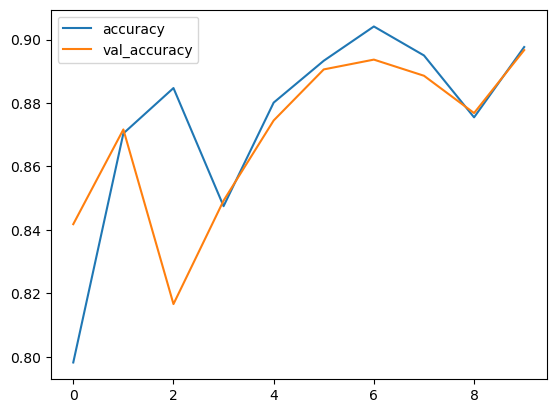

313/313 [==============================] - 4s 12ms/step - loss: 0.3077 - accuracy: 0.8896

Test Confusion Maxtrix: 
313/313 [==============================] - 3s 6ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,779,0,23,11,4,1,178,0,4,0
1,1,980,1,13,2,0,1,0,2,0
2,6,1,824,10,90,0,68,0,1,0
3,14,11,10,885,31,0,49,0,0,0
4,0,0,63,19,824,0,94,0,0,0
5,0,0,0,0,0,966,0,25,1,8
6,81,3,57,16,62,0,774,0,7,0
7,0,0,0,0,0,10,0,986,0,4
8,1,1,2,7,8,0,2,3,976,0


In [41]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_ResNet50.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
model = ResNet50(input_tensor=inputs, 
                 pooling='max', include_top=True, weights=None)
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


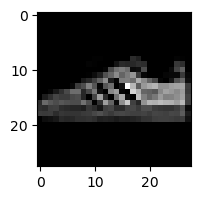

1/1 [==============================] - 1s 612ms/step
예측값:  Sneaker


In [42]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

# **Problem:** 컬러사물이미지 분류

## Data Preprocessing

In [43]:
# Train, Test 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [44]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (50000, 32, 32, 3) 0 255
Y:  (50000, 1)
----------------test----------------
X:  (10000, 32, 32, 3) 0 255
Y:  (10000, 1)


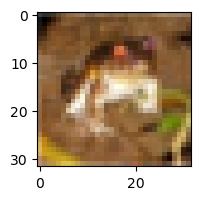

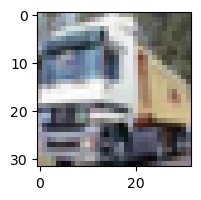

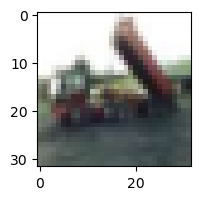

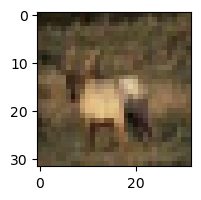

Label of train:  ['Frog', 'Truck', 'Truck', 'Deer']


In [45]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i])
    plt.show()

Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('Label of train: ', [Y_label_list[num] for num in Y_train.flatten()[:4]])

## MLP

normalized X:  (50000, 32, 32, 3) 0.0 1.0
normalized X:  (10000, 32, 32, 3) 0.0 1.0
X_train: (50000, 3072) Y_train: (50000, 10)
X_test: (10000, 3072) Y_test: (10000, 10)
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_14 (Dense)            (None, 256)               786688    
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
625/

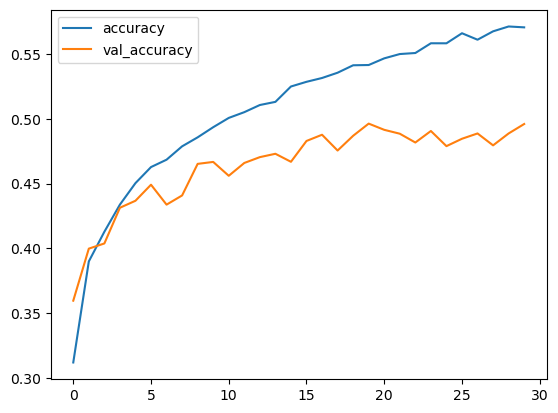

313/313 [==============================] - 1s 2ms/step - loss: 1.4644 - accuracy: 0.4971

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,530,23,74,30,34,38,19,52,159,41
1,50,548,20,29,15,34,11,35,72,186
2,62,17,383,70,148,123,85,69,29,14
3,18,12,104,283,61,300,100,62,26,34
4,41,11,158,51,437,85,89,88,32,8
5,13,9,89,169,66,466,69,74,30,15
6,8,6,89,101,137,93,520,22,13,11
7,30,10,60,48,102,119,20,558,21,32
8,80,56,16,24,23,34,8,19,682,58


In [46]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

normalized X:  (50000, 32, 32, 3) 0.0 1.0
normalized X:  (10000, 32, 32, 3) 0.0 1.0
X_train: (50000, 32, 32, 3) Y_train: (50000, 10)
X_test: (10000, 32, 32, 3) Y_test: (10000, 10)
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        73792     
           

Training:   0%|                                                                                0/30 ETA: ?s,  …

Epoch 1/30
625/625 [==============================] - 18s 29ms/step - loss: 1.8604 - accuracy: 0.3130 - val_loss: 1.4589 - val_accuracy: 0.4815
Epoch 2/30
625/625 [==============================] - 4s 7ms/step - loss: 1.5238 - accuracy: 0.4423 - val_loss: 1.3089 - val_accuracy: 0.5482
Epoch 3/30
625/625 [==============================] - 4s 6ms/step - loss: 1.4020 - accuracy: 0.4872 - val_loss: 1.2101 - val_accuracy: 0.5827
Epoch 4/30
625/625 [==============================] - 4s 6ms/step - loss: 1.3134 - accuracy: 0.5185 - val_loss: 1.1712 - val_accuracy: 0.5993
Epoch 5/30
625/625 [==============================] - 4s 6ms/step - loss: 1.2631 - accuracy: 0.5357 - val_loss: 1.0859 - val_accuracy: 0.6301
Epoch 6/30
625/625 [==============================] - 4s 6ms/step - loss: 1.2193 - accuracy: 0.5591 - val_loss: 1.0464 - val_accuracy: 0.6358
Epoch 7/30
625/625 [==============================] - 14s 22ms/step - loss: 1.1766 - accuracy: 0.5738 - val_loss: 1.0314 - val_accuracy: 0.6450
Ep

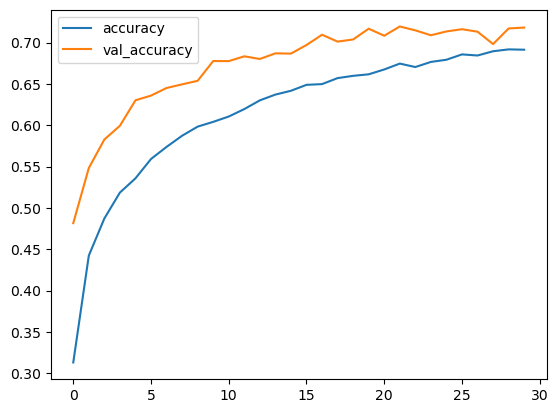

313/313 [==============================] - 1s 2ms/step - loss: 0.8439 - accuracy: 0.7128

Test Confusion Maxtrix: 
313/313 [==============================] - 1s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,680,13,76,26,19,8,7,18,113,40
1,12,813,6,9,2,4,12,6,36,100
2,44,2,608,61,106,63,64,29,17,6
3,7,5,82,527,57,193,55,34,24,16
4,19,2,96,71,616,28,60,89,16,3
5,6,3,54,169,37,649,16,49,12,5
6,3,1,57,74,46,28,772,7,8,4
7,13,0,55,28,51,53,4,786,1,9
8,44,20,13,21,10,4,2,3,866,17


In [47]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_CNN.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], 
                      X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv2D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


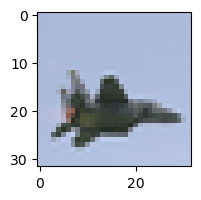

1/1 [==============================] - 0s 85ms/step
예측값:  Airplane


In [48]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

## ResNet50

normalized X:  (50000, 32, 32, 3) 0.0 1.0
normalized X:  (10000, 32, 32, 3) 0.0 1.0
X_train: (50000, 32, 32, 3) Y_train: (50000, 10)
X_test: (10000, 32, 32, 3) Y_test: (10000, 10)
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn 

                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 8, 8, 64)     36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 8, 8, 64)    256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 8, 8, 64)    0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 8, 8, 256)    16640       ['conv2_block3_2_relu[0][0]']    
          

                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 4, 4, 128)    147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block3_2_relu[0][0]']    
          

                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 2, 2, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
          

                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 2, 2, 1024)   0           ['conv4_block4_out[0][0]',       
          

                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 1, 1, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 1, 1, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 1, 1, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 1, 1, 2048)   0           ['conv5_block1_out[0][0]',       
          

Training:   0%|                                                                                0/30 ETA: ?s,  …

Epoch 1/30
625/625 [==============================] - 50s 75ms/step - loss: 1.9800 - accuracy: 0.3521 - val_loss: 2.2657 - val_accuracy: 0.2783
Epoch 2/30
625/625 [==============================] - 36s 57ms/step - loss: 1.8381 - accuracy: 0.4209 - val_loss: 1.7514 - val_accuracy: 0.3663
Epoch 3/30
625/625 [==============================] - 46s 74ms/step - loss: 1.9388 - accuracy: 0.3843 - val_loss: 1.9463 - val_accuracy: 0.3460
Epoch 4/30
625/625 [==============================] - 34s 54ms/step - loss: 1.9086 - accuracy: 0.3779 - val_loss: 3.0424 - val_accuracy: 0.1184
Epoch 5/30
625/625 [==============================] - 33s 52ms/step - loss: 1.6356 - accuracy: 0.4676 - val_loss: 2.4276 - val_accuracy: 0.3760
Epoch 6/30
625/625 [==============================] - 34s 54ms/step - loss: 1.4827 - accuracy: 0.5200 - val_loss: 3.6078 - val_accuracy: 0.3382
Epoch 7/30
625/625 [==============================] - 49s 78ms/step - loss: 1.6288 - accuracy: 0.4710 - val_loss: 1.8027 - val_accuracy:

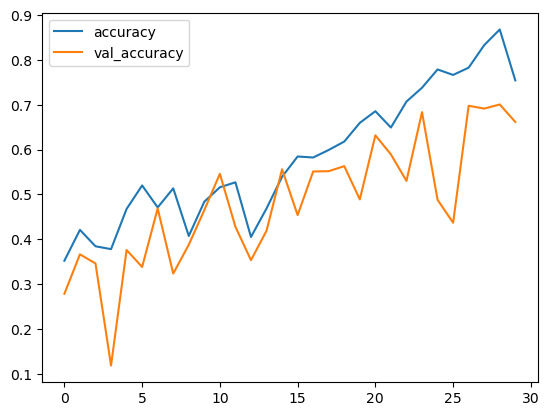

313/313 [==============================] - 5s 14ms/step - loss: 1.0747 - accuracy: 0.6521

Test Confusion Maxtrix: 
313/313 [==============================] - 3s 7ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,717,12,129,19,11,8,7,6,70,21
1,43,771,23,14,7,13,22,6,53,48
2,49,3,739,59,33,59,27,19,8,4
3,24,6,139,525,30,198,39,26,11,2
4,23,5,169,123,516,81,36,42,5,0
5,21,1,101,181,29,617,12,30,4,4
6,6,2,124,126,22,61,644,5,8,2
7,12,4,73,64,59,117,1,664,3,3
8,80,26,49,32,4,15,5,7,773,9


In [49]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_ResNet50.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
model = ResNet50(input_tensor=inputs, pooling='max', include_top=True, weights=None,
                 classes=10)
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


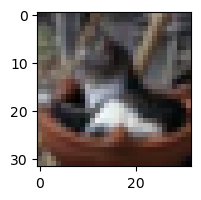

1/1 [==============================] - 1s 549ms/step
예측값:  Deer


In [50]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

# **Problem:** 보스턴 집값 예측

|   **변수**  |              **설명**              |
|:-------:|:------------------------------:|
|  **Price**  |            주택 가격           |
|   **CRIM**  |        1인당 범죄 발생률       |
|    **ZN**   |       주택용 토지의 비율       |
|  **INDUS**  |      비소매 상업지역 비율      |
|   **CHAS**  |    찰스강 인접 여부(인접=1)    |
|   **NOX**   |         일산화질소 농도        |
|    **RM**   |            방의 개수           |
|   **AGE**   | 1940년 이전에 건축된 주택 비율 |
|   **DIS**   |     주요 5대 회사와의 거리     |
|   **RAD**   |         고속도로 접근성        |
|   **TAX**   |             재산세             |
| **PTRATIO** |       교사와 학생의 비율       |
|    **B**    |         흑인 거주 비율         |
|  **LSTAT**  |          저소득층 비율         |

## MLP

(404, 13) (404, 1)
(102, 13) (102, 1)
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 18)]              0         
                                                                 
 dense_19 (Dense)            (None, 256)               4864      
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)

Training:   0%|                                                                               0/500 ETA: ?s,  …

Epoch 30: early stopping


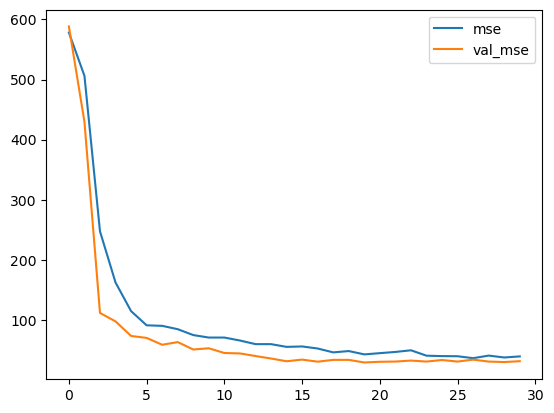

4/4 [==============================] - 0s 1ms/step


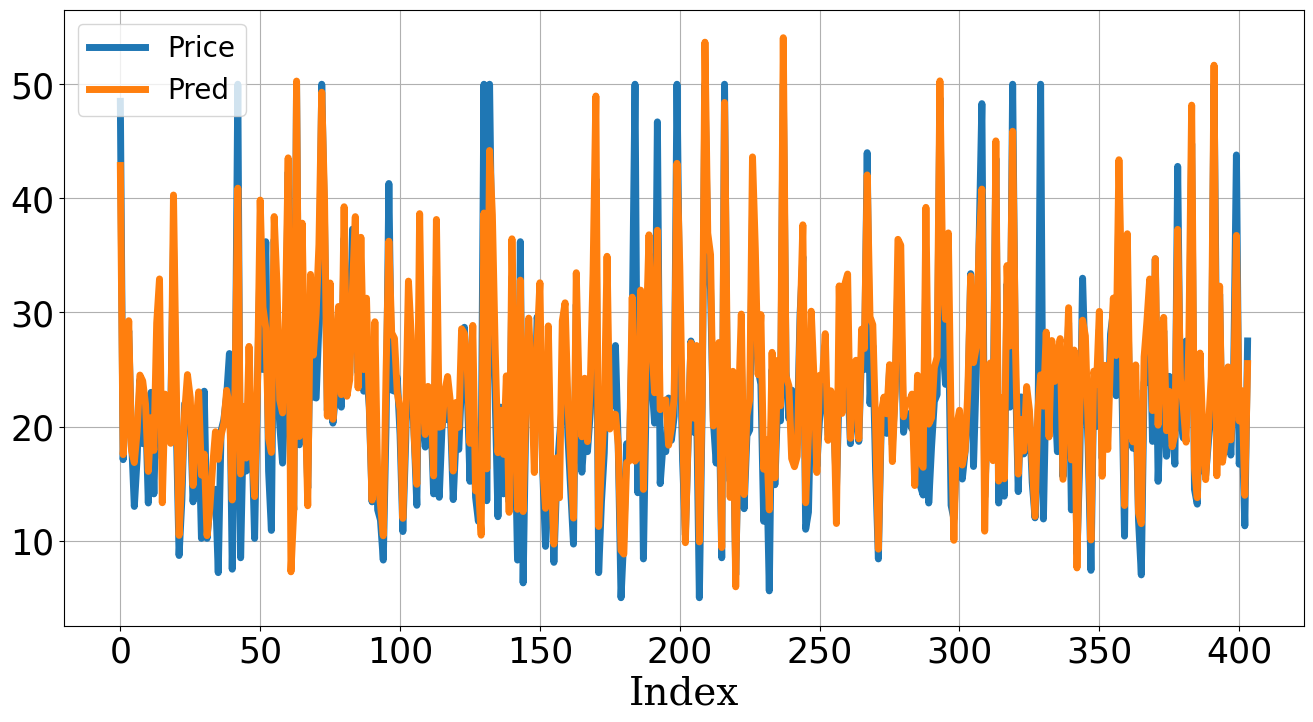

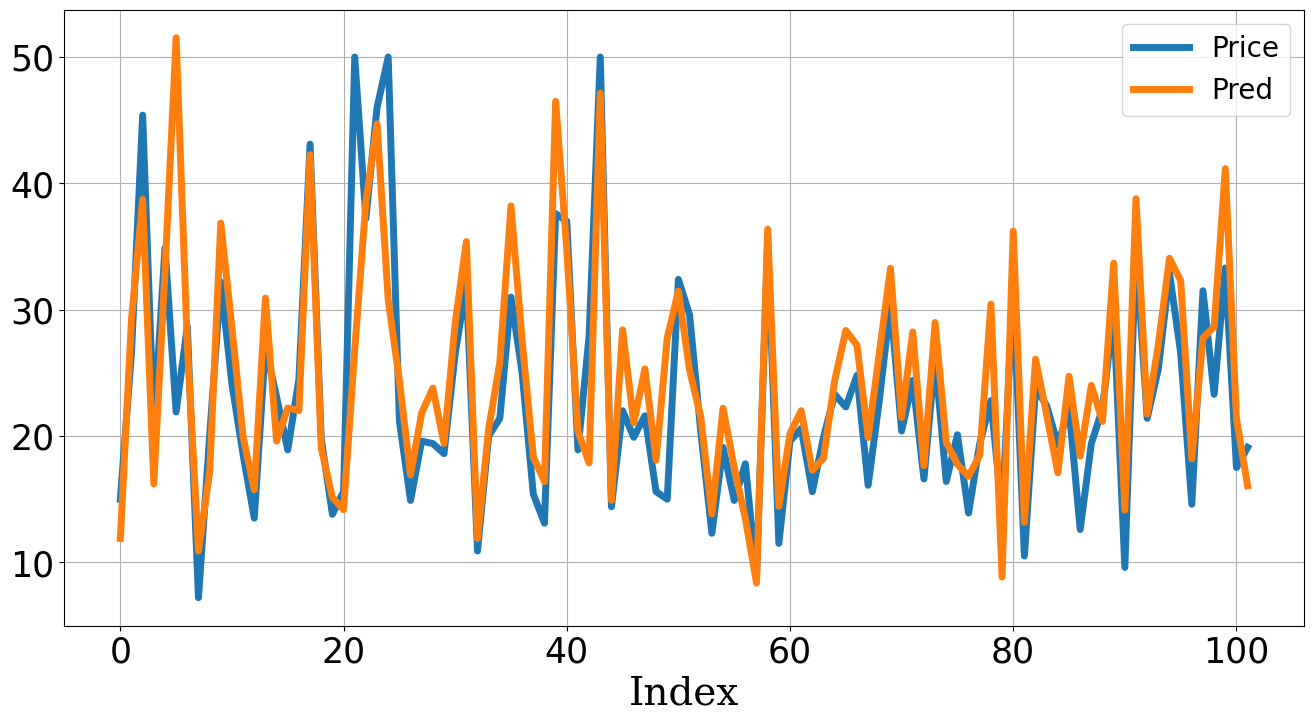

,MAE,MSE,MAPE
Train,3.12,18.19,0.16
Test,3.71,31.30,0.17


In [51]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','BostonHousing_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      validation_data=(X_test_fes, Y_test),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

4/4 [==============================] - 0s 2ms/step


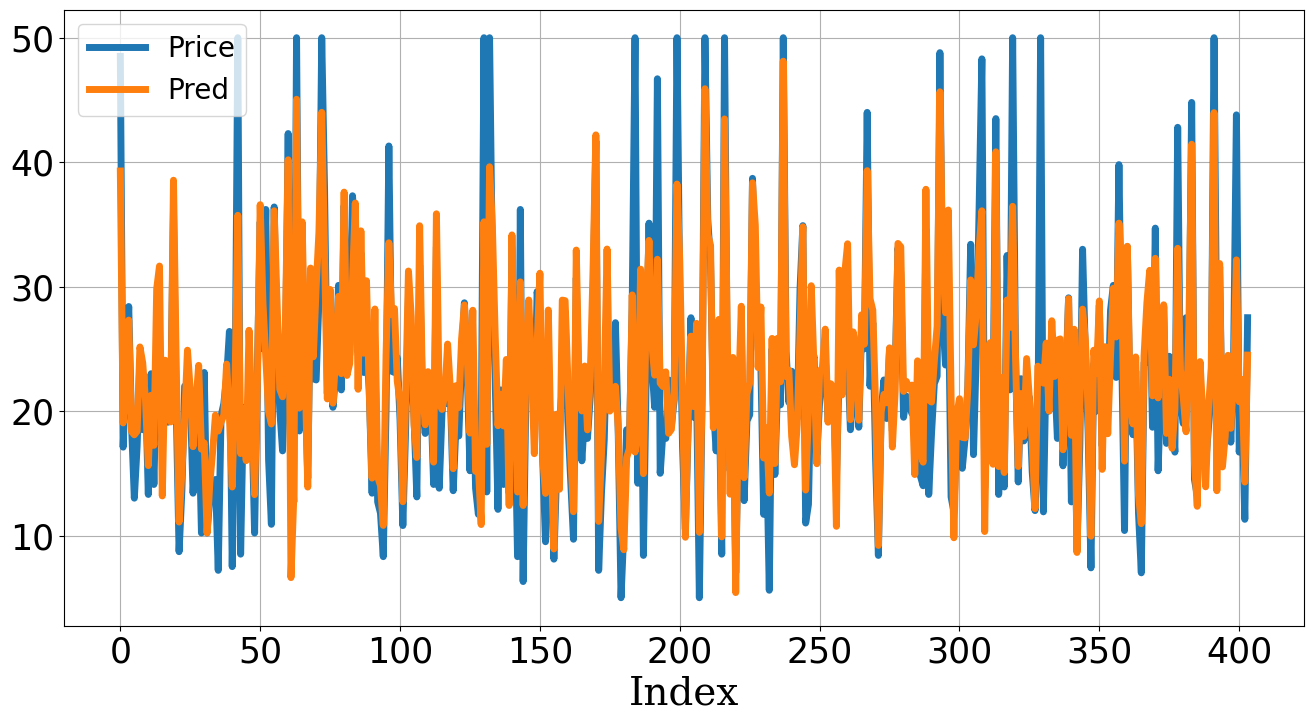

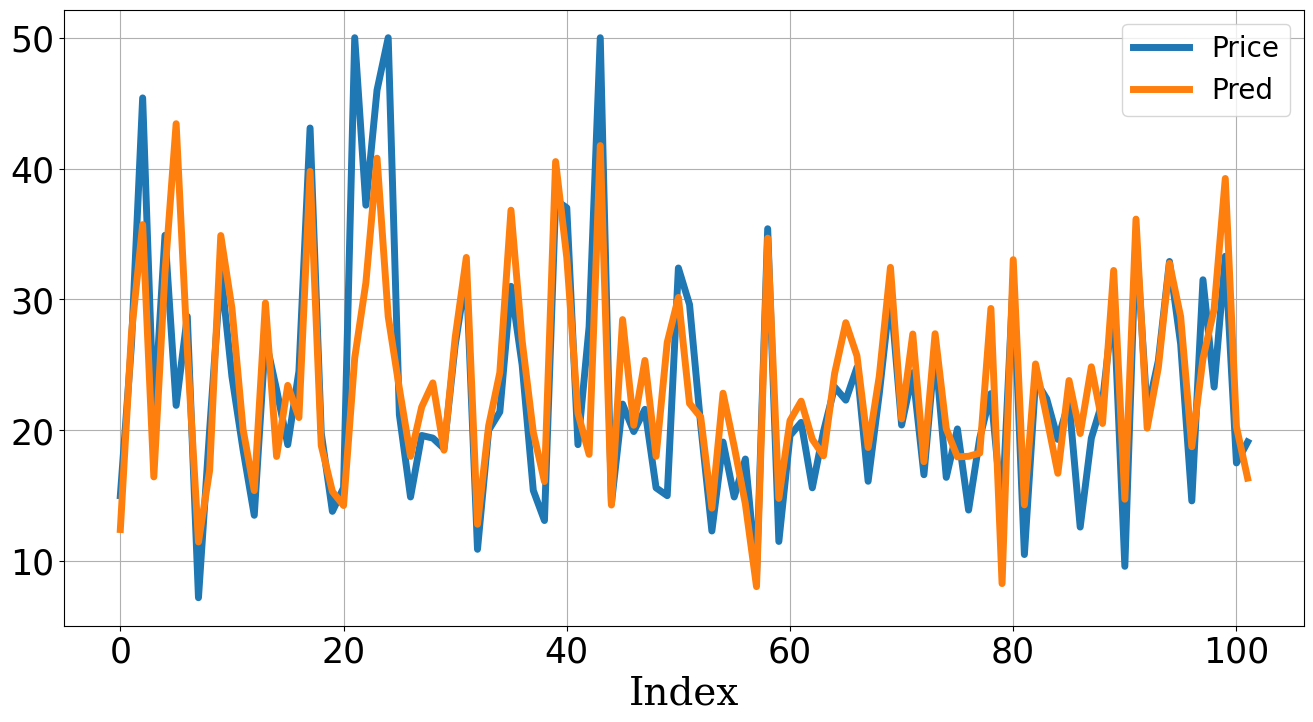

,MAE,MSE,MAPE
Train,3.16,20.69,0.16
Test,3.67,29.14,0.17


In [52]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

## CNN

<center><img src='Image/Expert/Conv1D2D3D.PNG' width='800'>(https://i.stack.imgur.com/)</center>

(404, 13) (404, 1)
(102, 13) (102, 1)
X_train: (404, 18, 1) Y_train: (404, 1)
X_test: (102, 18, 1) Y_test: (102, 1)
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 18, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 18, 128)           512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 128)           0         
 )                                                               
                                                                 
 dropout_13 (Dropout)        (None, 9, 128)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 64)             24640     
                                                                 
 max_pool

Training:   0%|                                                                               0/500 ETA: ?s,  …

Epoch 107: early stopping


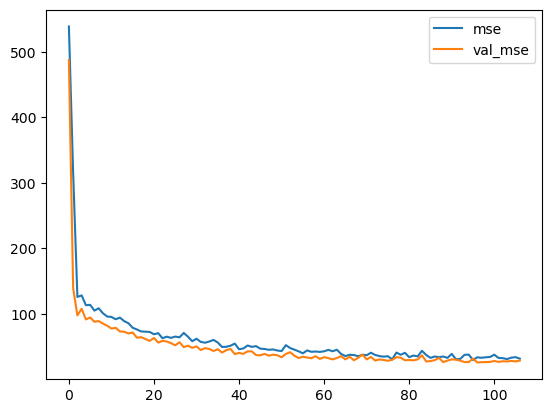

4/4 [==============================] - 0s 2ms/step


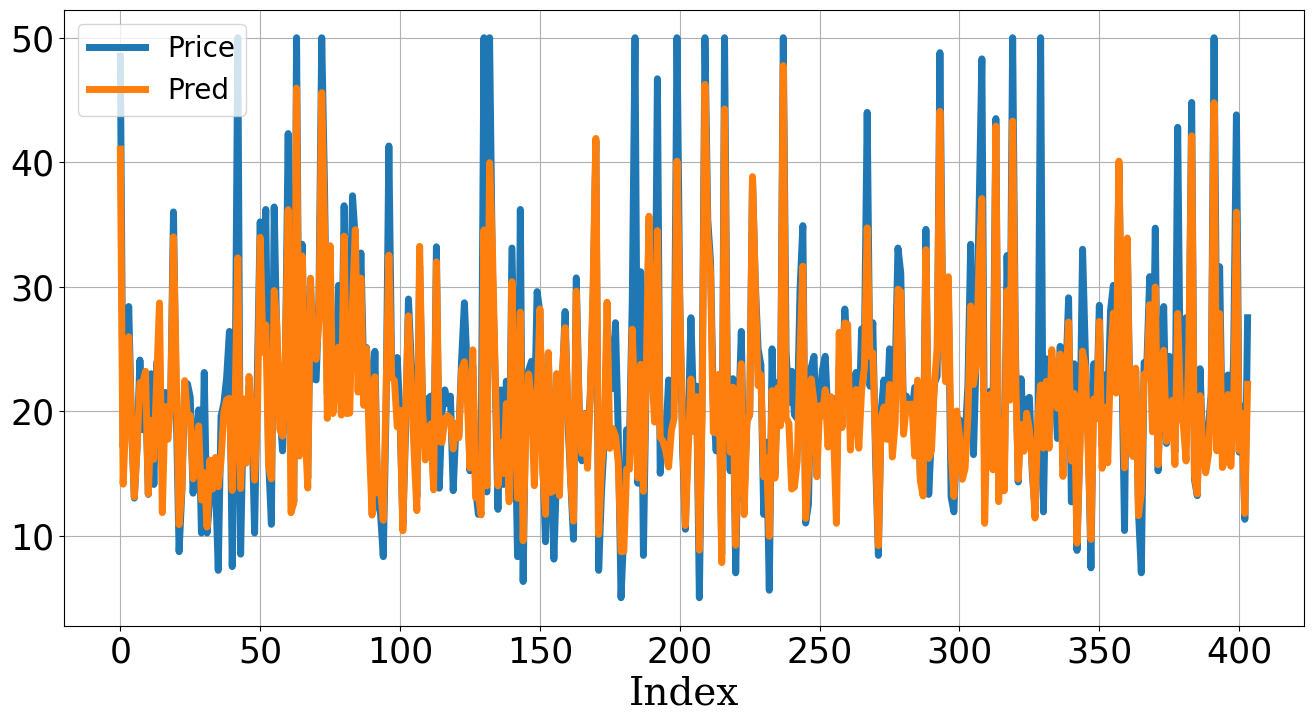

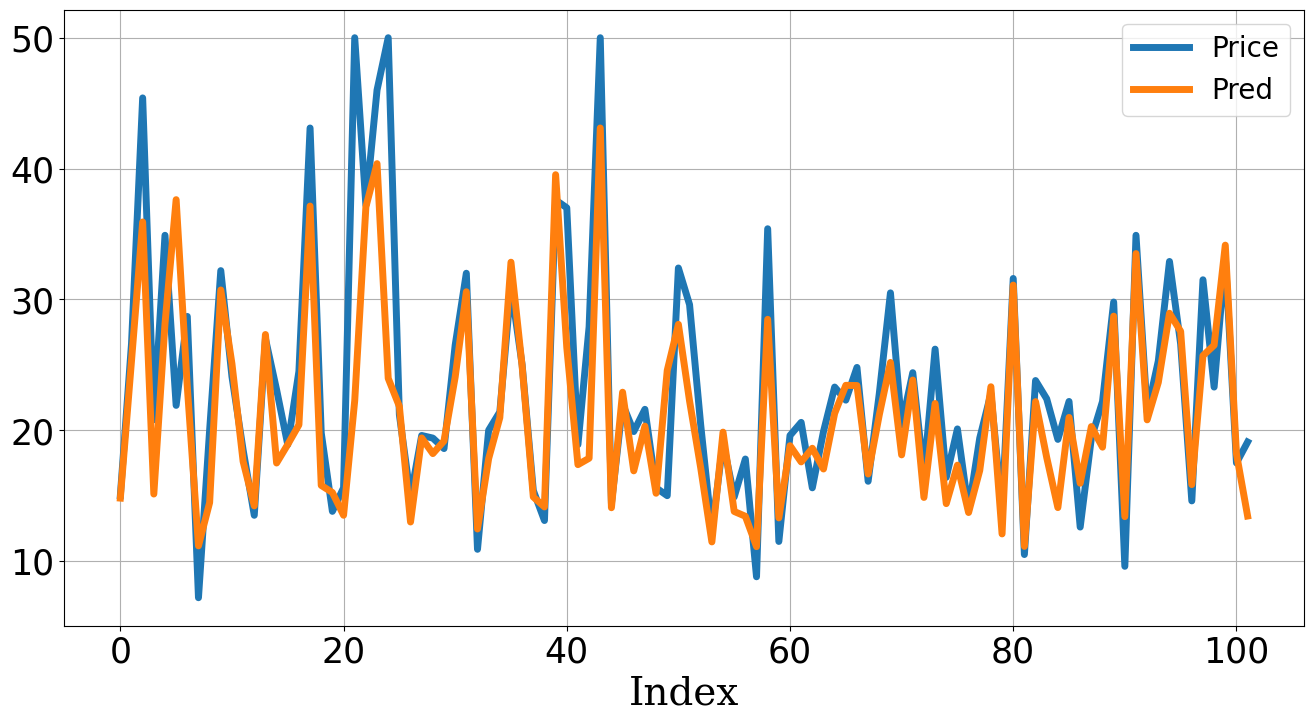

,MAE,MSE,MAPE
Train,2.59,16.49,0.12
Test,3.23,28.87,0.13


In [53]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = 3
STRIDE = 1
POOL_SIZE = 2
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','BostonHousing_CNN.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Reshape
X_train = X_train_fes.values.reshape(-1, X_train_fes.shape[1], 1)
X_test = X_test_fes.values.reshape(-1, X_test_fes.shape[1], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))   
hiddens = Conv1D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling1D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv1D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling1D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, 
                      validation_data=(X_test, Y_test),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

4/4 [==============================] - 0s 2ms/step


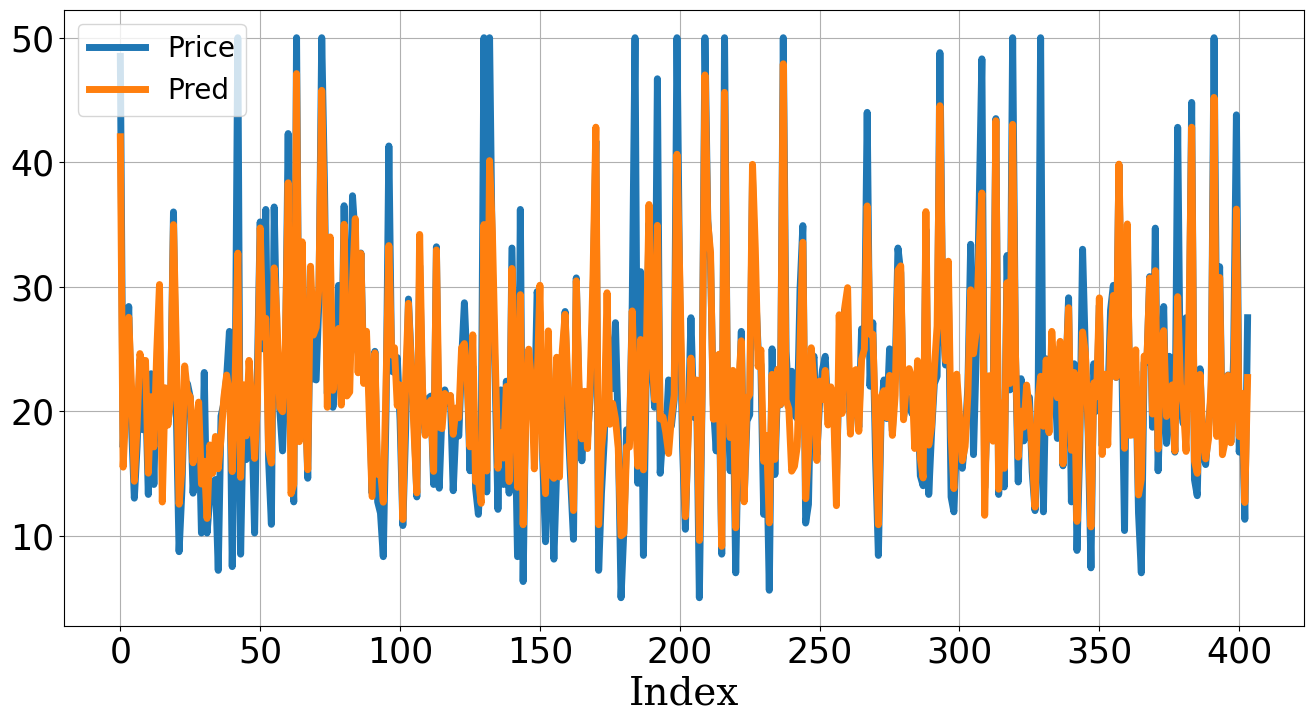

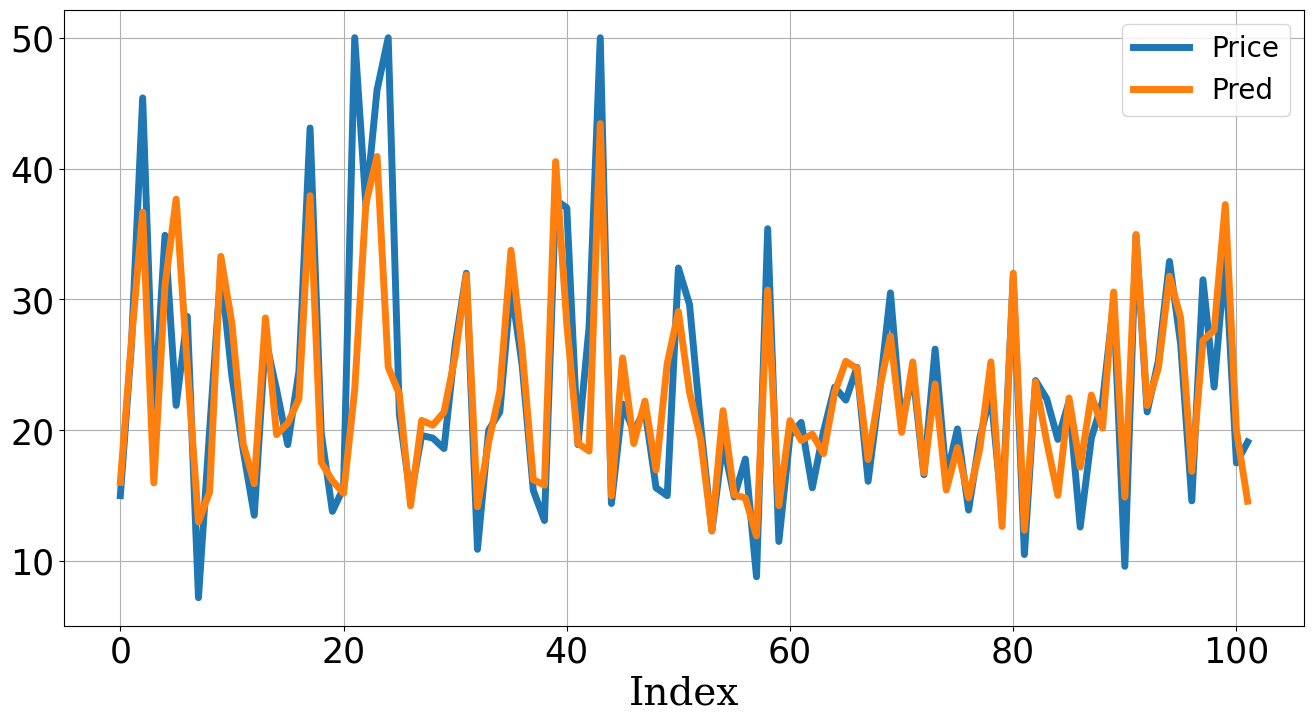

,MAE,MSE,MAPE
Train,2.53,15.46,0.13
Test,3.02,25.98,0.13


In [54]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)